<a href="https://colab.research.google.com/github/amitbanik344/Catering-Services-Dataset-Analysis/blob/main/Catering_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import libraries

In [ ]:
#importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load the data

In [ ]:
#Load data:
df = pd.read_csv('Catering Services.csv')
output = []
output.append("Data Anayalsis of Catering Services\n")
output.append("==================\n")

## Step 3: Explore the data

In [ ]:
#Reading data
print(df.head())
output.append(f"\nFirst few rows of the data:\n{df.head()}\n")


         Date             Product Region Customer_Type  Quantity    Price  \
0  2024-08-20  Corporate Catering  South    Individual       120  6367.64   
1  2024-06-01    Wedding Catering   East     Corporate       151  4099.24   
2  2024-06-29  Corporate Catering  South     Corporate       111   912.53   
3  2024-10-20    Wedding Catering  South     Corporate        19  3654.61   
4  2024-02-27      Event Catering   West    Individual        31  8073.45   

   Discount    Revenue  
0      0.04  733552.13  
1      0.03  600415.68  
2      0.02   99265.01  
3      0.16   58327.58  
4      0.09  227752.02  


In [ ]:
#Basic info about the data

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [ ]:
#Using descirbe

print(df.describe())
output.append(f"Description of the data:\n{df.describe()}\n")

          Quantity        Price     Discount       Revenue
count  1000.000000  1000.000000  1000.000000  1.000000e+03
mean    104.379000  5225.168320     0.148370  4.671884e+05
std      56.757191  2717.186121     0.089005  3.830226e+05
min       1.000000   516.670000     0.000000  9.533900e+02
25%      58.000000  2904.505000     0.070000  1.458076e+05
50%     105.000000  5182.830000     0.150000  3.698743e+05
75%     154.000000  7580.985000     0.230000  6.954224e+05
max     200.000000  9999.590000     0.300000  1.833641e+06


## Step 4: Clean the data

In [ ]:
output.append("Data Cleaning Result:\n")
#Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing values:\n{missing_values}\n")
#fill or drop missing values
df.dropna(inplace=True)
#coverting the Date colum to datetime format
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicates Dropped: {duplicates}\n")
df.drop_duplicates(inplace=True)

Number of duplicates Dropped: 0



## Step 5: Analyze the data


In [ ]:
#Total revenue from the Catering Services
total_revenue = df['Revenue'].sum()
output.append(f"Total Revenue: ${total_revenue}\n")
print(f"Total Revenue: ${total_revenue}\n")


Total Revenue: $467188386.15



In [ ]:
#average price per customer_typewise
avarage_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append("Average Price per Customer Type:\n")
output.append(f"{avarage_price_per_service}\n")
print(avarage_price_per_service)

Customer_Type
Corporate     5091.878818
Individual    5357.925729
Name: Price, dtype: float64


In [ ]:
#total services provided by region
total_services_by_region = df['Region'].value_counts()
output.append("Total Services Provided by Region:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)

Region
East     260
South    258
North    256
West     226
Name: count, dtype: int64


In [ ]:
#Total revenue by region
total_revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Region:\n")
output.append(f"{total_revenue_by_region}\n")
print(total_revenue_by_region)

Region
East     1311627.35
North    1336442.43
South    1391413.44
West     1185685.10
Name: Price, dtype: float64


## Step 6: Visualize the data

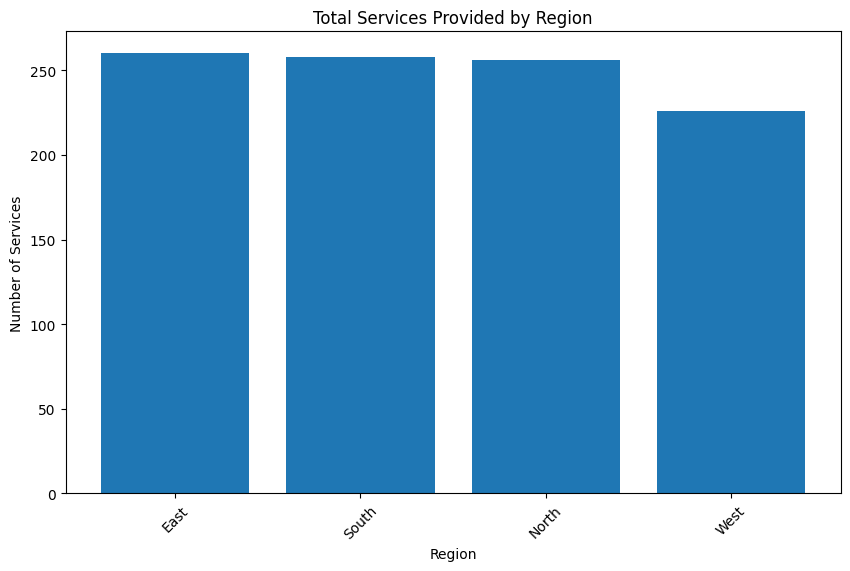

In [ ]:
#Visusaize

#bar
plt.figure(figsize=(10, 6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')  # Save the plot as an image
plt.show()

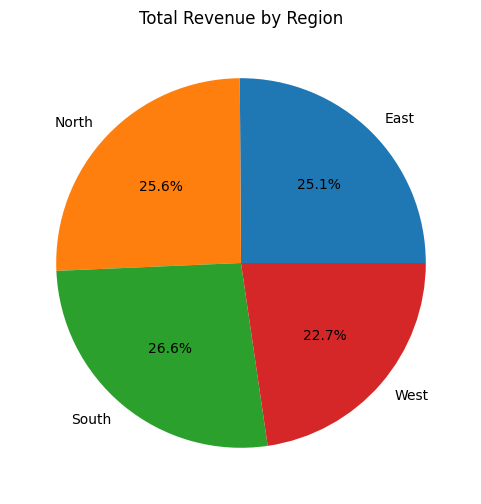

In [ ]:
#pie_chart
plt.figure(figsize=(6, 6))
plt.pie(total_revenue_by_region.values, labels=total_revenue_by_region.index, autopct='%1.1f%%')
plt.title('Total Revenue by Region')
plt.savefig('total_revenue_by_region.png')
plt.show()

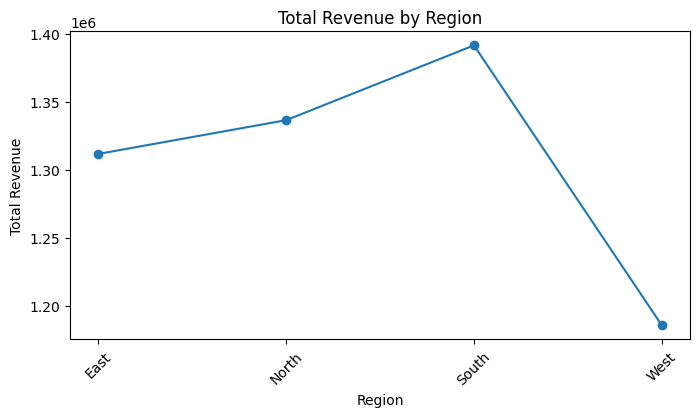

In [ ]:
#line_chart
plt.figure(figsize=(8, 4))
plt.plot(total_revenue_by_region.index, total_revenue_by_region.values, marker='o')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.savefig('total_revenue_by_region.png')
plt.show()

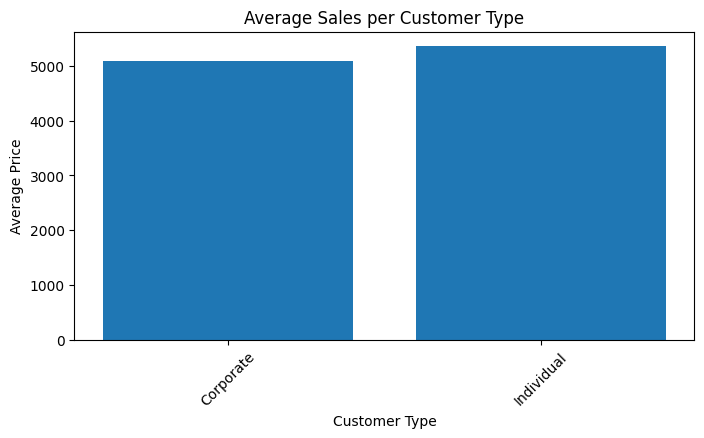

In [ ]:
#bar_chart of sales of Corporate and Individual
plt.figure(figsize=(8, 4))
plt.bar(avarage_price_per_service.index, avarage_price_per_service  .values)
plt.title('Average Sales per Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('avarage_price_per_service.png')
plt.show()

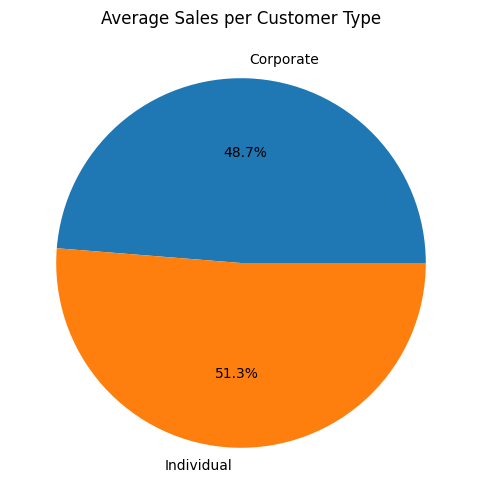

In [ ]:
#pie_chart of sales of Corporate and Individual
plt.figure(figsize=(6, 6))
plt.pie(avarage_price_per_service.values, labels=avarage_price_per_service.index, autopct='%1.1f%%')
plt.title('Average Sales per Customer Type')
plt.savefig('avarage_price_per_service.png')
plt.show()

## Save output in the file

In [ ]:
with open('analysis.txt', 'w') as f:
    for line in output:
        f.write(line)